## Share_market(Linear_Regression)
#### Ramanathan N

In [1]:
import numpy as np
import pandas as pd
import datetime
import quandl

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
#start_date = datetime.date(2017,1,1)
#end_date = datetime.date(2018,12,28)
data = pd.read_csv("D:\google chrome\BAJAJ_AUTO.csv", low_memory = False, skiprows = 1, encoding = "ISO-8859-1")
#data = quandl.get("BSE/BOM532814", authtoken="43vNrp7GWQtzPqyguXPB")
print("The GTD dataset has {} samples with {} features.".format(*data.shape))

The GTD dataset has 2347 samples with 9 features.


In [3]:
data=data.iloc[0:2300]
data=data.iloc[::-1]

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,Unnamed: 8
2299,09-03-2010,725.919473,732.485081,712.005731,715.441223,266824,NaN,NaN,NaN
2298,10-03-2010,712.292022,723.361940,700.458660,706.146308,383774,NaN,NaN,NaN
2297,11-03-2010,706.146308,713.208153,685.609700,697.061340,458692,NaN,NaN,NaN
2296,12-03-2010,698.550053,708.093087,693.034180,703.168882,385242,NaN,NaN,NaN
2295,15-03-2010,706.146308,708.093087,696.259725,698.397365,134402,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 2299 to 0
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2300 non-null   object 
 1   Open               2300 non-null   float64
 2   High               2300 non-null   float64
 3   Low                2300 non-null   float64
 4   Close              2300 non-null   float64
 5   Volume             2300 non-null   int64  
 6   Adjustment Factor  11 non-null     float64
 7   Adjustment Type    11 non-null     float64
 8   Unnamed: 8         0 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 161.8+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,Unnamed: 8
count,2300.000000,2300.000000,2300.000000,2300.000000,2.300000e+03,11.000000,11.000000,0.0
mean,1868.802518,1889.153953,1847.026175,1867.438020,3.682937e+05,0.936224,16.636364,NaN
std,600.934559,605.071082,595.681817,599.806076,3.101772e+05,0.144851,1.206045,NaN
min,696.259725,702.920763,685.609700,691.049229,0.000000e+00,0.500000,13.000000,NaN
25%,1350.045296,1372.211692,1330.838328,1351.437714,2.093632e+05,0.974012,17.000000,NaN
50%,1808.507904,1820.762901,1786.868935,1804.662010,3.017950e+05,0.978722,17.000000,NaN
75%,2440.819679,2467.079586,2415.096675,2435.623617,4.481895e+05,0.980355,17.000000,NaN
max,3135.962998,3181.227629,3064.511838,3130.413839,4.976986e+06,0.998118,17.000000,NaN


In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor',
       'Adjustment Type', 'Unnamed: 8'],
      dtype='object')

In [8]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data,columns=['Date','Close'])

In [9]:
df.head()

,Date,Close
2299,09-03-2010,715.441223
2298,10-03-2010,706.146308
2297,11-03-2010,697.061340
2296,12-03-2010,703.168882
2295,15-03-2010,698.397365


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 2299 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2300 non-null   object 
 1   Close   2300 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.1+ KB


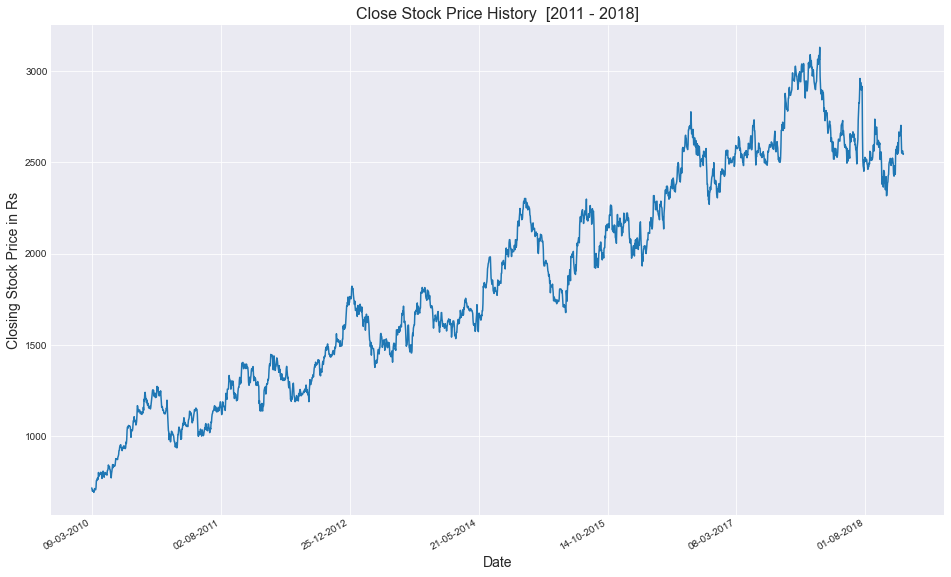

In [11]:
import matplotlib.dates as mdates


years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')  # add some space for the year label

fig,ax = plt.subplots()
ax.plot(df['Date'],df['Close'])

ax.xaxis.set_minor_locator(months)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)

# Set figure title
plt.title('Close Stock Price History  [2011 - 2018]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in Rs', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df,test_size=0.20)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [16]:
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.8741740365206278
Intercept:  2875.5836622966176


<ipython-input-17-fc26bccc6186>:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


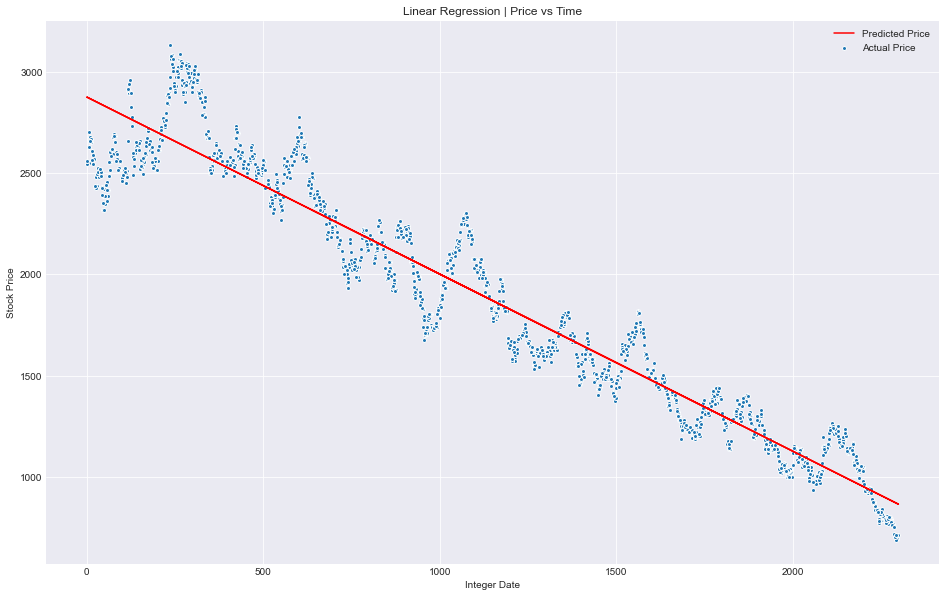

In [18]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [20]:
y_pred = model.predict(X_test)
print(y_pred[0:25])
#df['Prediction'] = y_pred[:24]

[1877.27691259 1000.48035396 2204.21800225 2038.99910935 2558.25848704
 1143.84489595 1871.15769433 2465.59603917 1750.52167729 1530.22982009
 1965.56849028 2252.29757426 2393.03959414 1876.40273855 1104.50706431
 1990.91953734 2122.91981685 1018.83800873 2432.37742578 2520.66900347
 2178.86695519 1045.93740386 1917.48891827 1152.58663631 1282.83856776]


In [21]:
df.shape

(2300, 2)

In [22]:
print(type(y_pred))
# Generate 25 random numbers
randints = np.random.randint(1500, size=20)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample['Prediction']=y_pred[0:20]

<class 'numpy.ndarray'>


<ipython-input-22-5a7aa456753a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Prediction']=y_pred[0:20]


In [23]:
df_sample.head()

,Date,Close,Prediction
1485,22-04-2013,1449.415506,1877.276913
1453,05-06-2013,1443.701215,1000.480354
1261,28-02-2014,1639.319617,2204.218002
1240,31-03-2014,1754.918876,2038.999109
1190,09-06-2014,1820.740967,2558.258487


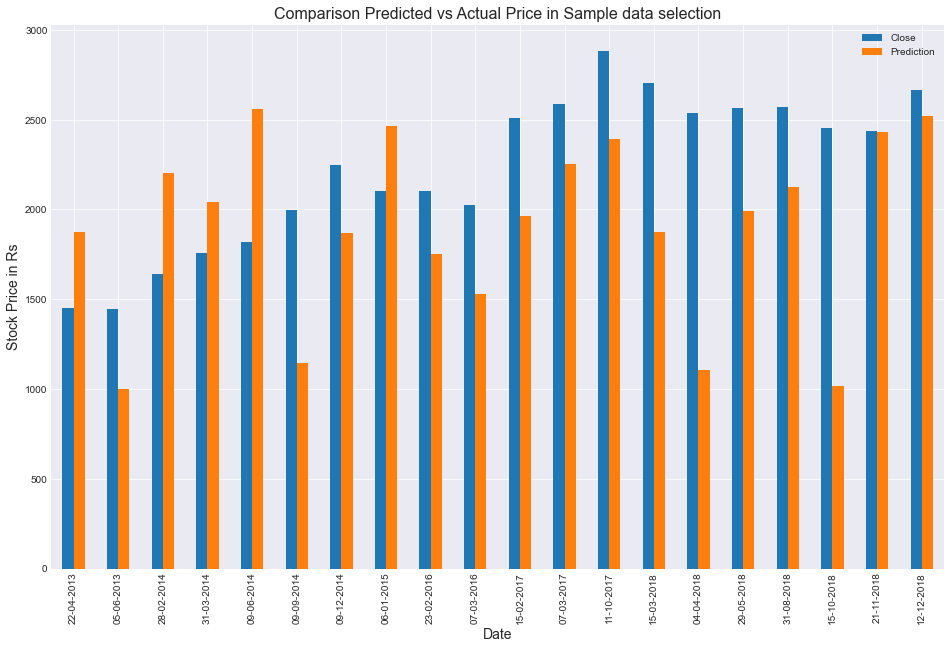

In [24]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in Rs', fontsize=14)

# Show plot
plt.show()

D:\Movies\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


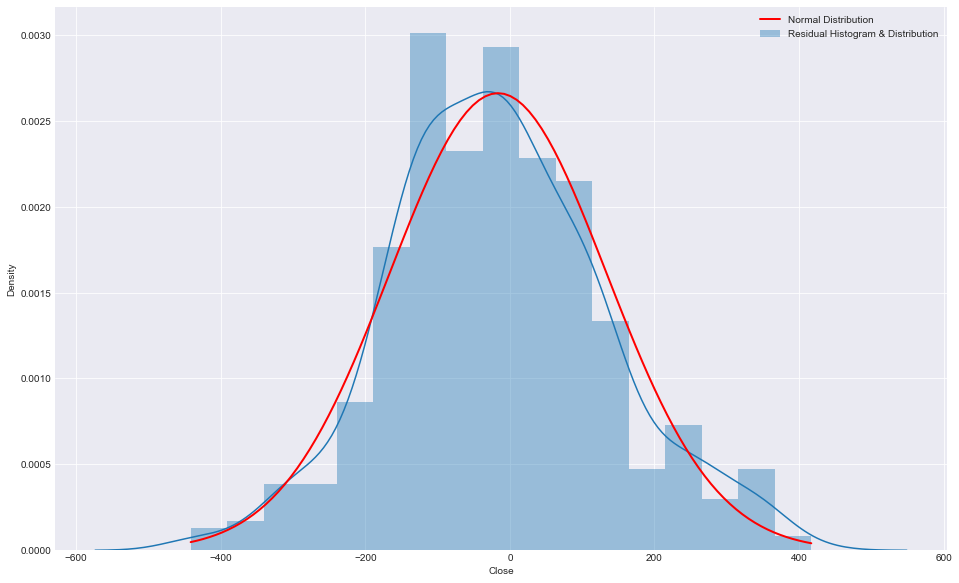

In [25]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [26]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [27]:
df.head()

,Date,Close,Prediction
2299,09-03-2010,715.441223,865.857552
2298,10-03-2010,706.146308,866.731726
2297,11-03-2010,697.061340,867.605900
2296,12-03-2010,703.168882,868.480074
2295,15-03-2010,698.397365,869.354248


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 119.15839620737158
Root Mean Squared Error: 150.87233071691654


In [29]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.930111715154097


In [30]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9309388147439461